This notebook was created for the study of a galaxy Seyfert Type II.

In [1]:
## Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import quad

from astropy import units as u
from astropy import constants as const

Defining our source

In [2]:
m = 2e7 # M / M_sun

mdot = 0.7 # Mdot / Mdot_Edd

l = 10    # L / R_sch
l_x = 5   # L_x * R_sch  = 1 p simplificação inicial - depois vemos no espaço paramétrico
r_x = 6   # R_x / R_sch

In [3]:
## Fixed Constants

Mdot_Edd = 1.45e18 * m # [g s-1]
R_sch = 2.96e5 * m # [cm]

# c = 3e10 * u.cm * u.s**(-1)

c = 2.9979e10 # [cm/s]
m_e = 9.1093e-28 # [g]
m_p = 1.6726e-24 # [g]
sigma_T = 6.6524e-25 # [cm2]
e = 4.8032e-10 # [statcoul]

alpha_f = 1/137 # fine structure constant [dim.]
r_0 = 2.8179e-13 # electron classical radius [cm]

In [4]:
Gamma = 1 / np.sqrt(2)

# q = ( 1 - ( 3 * R_sch / R_X)**(1/2) )**(1/4) # KGS15 page 4
q = ( 1 - ( 3 * r_x**(-1) )**(1/2) )**(1/4) # KGS15 page 4

v_A0 = c  # Khiali 2015 page 38

In [5]:
# c = (const.c).to('cm s-1')
# m_e = (const.m_e).to('g')
# m_p = (const.m_p).to('g')
# sigma_T = (const.sigma_T).to('cm2')
# e = (const.e).value / (3.33564e-10) * u.statcoulomb

# alpha_f = 1/137 # fine structure constant [dim.]
# r_0 = 2.8179e-13 * u.cm # electron classical radius [cm]

In [6]:
## Parameters from Table (similar to Khiali 2016)

# M = 2e7 * u.M_sun

In [7]:
def mag_rec_power(Gamma, r_X, l, l_X, q, mdot, m):
    '''
    Magnetic recconection power released by turbulent fast reconnection in the surrounds of the BH.
    Equivalent to Equation (15) of Kadowaki, de Gouveia Dal Pino & Singh 2015.
    '''
    wdot_B = 1.66e35 * Gamma**(-1/2) * r_X**(-5/8) * l**(-1/4) * l_X * q**(-2) * mdot**(3/4) * m
    return wdot_B

In [8]:
## Estimated Parameters by Murase 2022, Blanco et al. 2023 & Kadowaki et al. 2015

# v_A0 = c  # Khiali 2015 page 38

## escala da coroa da zona de reconexão
# L = 10 * R_sch  # KGS15 tabela da param
# L_X = L # simplificação inicial - depois vemos no espaço paramétrico
# L_X = 5 * R_sch  # KGS15 tabela da param

# R_X = 6 * R_sch

# mdot = 0.7 # xi

## Parameters

# Gamma = 1 / np.sqrt(2)
# r_X = R_X / R_sch
# l = L / R_sch
# l_X = L_X / R_sch
# mdot = Mdot / Mdot_Edd
# m = M / u.M_sun

# q = ( 1 - ( 3 * R_sch / R_X)**(1/2) )**(1/4) # KGS15 page 4

In [9]:
## KGS15 page 4

# Gamma = (1 + (v_A0 / c )**2 )**(-1/2)
# v_A0 = 9.78e10 * Gamma**(-1/4) * r_X**(-17/16) * l**(3/8) * q * mdot**(3/8)

In [10]:
wdot_B = mag_rec_power(Gamma, r_x, l, l_x, q, mdot, m)

wdot_B # erg s-1

5.1225938888640925e+42

In [11]:
B_c = 9.96e8 * r_x**(-1.25) * mdot**(0.5) * m**(-0.5) #G

B_c # G

19842.861341570104

In [12]:
n_c = 8.02e18 * r_x**(-0.375) * Gamma**(0.5) * l**(-0.75) * q**(-2) * mdot**(0.25) * m**(-1) # cm-3

n_c # cm-3

51760683957.688774

In [13]:
T_c = 2.73e9 * Gamma**(1/4) * r_x**(-3/16) * l**(1/8) * q**(-1) * mdot**(1/8) # K

T_c # K

3101633394.265899

In [14]:
delta_RX = 11.6 * Gamma**(-5/4) * r_x**(31/16) * l**(-5/8) * l_x * q**(-3) * mdot**(-5/8) * m # cm

delta_RX # cm

42859936325.82682

In [15]:
delt_RX2 = 2.34e4 * Gamma**(-0.31) * r_x**(0.48) * l**(-0.15) * l_x * q**(-0.75) * mdot**(-0.15) * m # cm

delt_RX2 # cm - errado

5789158017973.296

In [16]:
print(f'\nReconnection Power:\n wdot_B = {wdot_B:.4E} erg s-1')
print(f'\nCoronal Magnetic Field:\n B_c = {B_c:.4E} G')
print(f'\nCoronal Particle Number Density:\n n_c = {n_c:.4E} cm-3')
print(f'\nCoronal Temperature:\n T_c = {T_c:.4E} K')
print(f'\nWidth of the current sheet:\n delta_RX = {delta_RX:.4E} cm or delt_RX2 = {delt_RX2:.4E} cm')


Reconnection Power:
 wdot_B = 5.1226E+42 erg s-1

Coronal Magnetic Field:
 B_c = 1.9843E+04 G

Coronal Particle Number Density:
 n_c = 5.1761E+10 cm-3

Coronal Temperature:
 T_c = 3.1016E+09 K

Width of the current sheet:
 delta_RX = 4.2860E+10 cm or delt_RX2 = 5.7892E+12 cm


In [17]:
## Source parameters

# erg = 1.602177e-12 # Convert eV to erg

# B = 1.9843e+04 # magnetic field [G]
# Ee = np.linspace(1e8, 1e14)*erg # Electron energy [erg]
# va0 = c # Alfvén Speed [cm/s]
# rho = B*B/(va0*va0*4*np.pi) # density [cm^-3]

# M = 2e7 # MBH [M⊙]
# P = 3 * 24 * 60 * 60 # Period in [s]
# R_b = P*c # Blob radius [cm]
# n = 5.1761e+10 # particle density [cm^-3]

In [18]:
erg = 1.602177e-12 # Convert eV to erg

B = B_c
n = n_c
Ee = np.linspace(1e8, 1e14)*erg # Electron energy [erg]
va0 = c # Alfvén Speed [cm/s]
rho = B*B/(va0*va0*4*np.pi) # density [cm^-3]

In [19]:
TeV = 1*1e12*erg

TeV

1.602177

In [20]:
MeV = 1 * 1e6 * erg

MeV

1.602177e-06

In [21]:
## Functions

## acceleration by reconnection and shock


# s * (E_0 / E)**(1/s) * t_0**(-1)
## proton ou eletron ? E0 é proton
## delta_RX é a length do acceleration region?

def tacc_rec(E,lacc,B,rho):
    """Implements Eq. (7) of Khiali et al. (2015)"""
    va0 = B / np.sqrt(4 * np.pi * rho)
    Gamma = 1 / np.sqrt(2)
    va = va0*Gamma
    t0 = lacc/va # Alfvén time [s]
    E0 = m_e*c*c # * 6.241509e11 # erg to ev

    return 1.3e5 * np.sqrt(m_p/m_e) * ((E/E0)**(-0.1)) * 1/t0
    

def tacc_shock(B,E):
    """Implements Eq. (10) of Romero et al. (2010a)"""
    eta = 0.1 # Efficiency of the acceleration [adim]

    return eta*e*c*B/E


## radiative losses (leptonic and hadronic)

def tloss_syn(B,E,m):
    """Implements Eq. (12) of Romero et al. (2010a)"""
    
    return (4/3)*((m_e/m)**3)*sigma_T*c*B*B/(m_e*c*c*8*np.pi) * (E/(m*c*c))

def tloss_bre(n,Z,E):
    """Implements Eq. (17) of Romero et al. (2010a)"""
    
    return 4*n*Z*Z*r_0*r_0*alpha_f*c*(np.log(2*E/(m_e*c*c))-1/3)


def tloss_pp(n,E):
    """Implements Eq. (19) of Khiali et al. (2015)"""
    L = np.log(E/ (1*1e12*erg) ) # 1 TeV = 1 * 1e12 * erg per eV
    E_th = 280 *1e6*erg # [MeV] 1 MeV = 1 * 1e6 * erg per eV - Proton threshold kinetic energy for neutral pion production
    sigma_pp = (34.3 + 1.88*L + 0.25*L**2) * (1 - (E_th/E)**4 )**2 # [mb] millibarn
    k_pp = 0.5 # Total inelasticity of the process
    
    return n*c*sigma_pp*k_pp


## for photomeson production (p-gamma)

def sigma_pgamma(epsilon_r):
    """cross-section"""
    if 300e6 * erg <= epsilon_r <= 500e6 * erg:
        return 340e-30  # 340 microbarn in cm^2
    elif epsilon_r > 500e6 * erg:
        return 120e-30  # 120 microbarn in cm^2
    else:
        return 0
    
def K_pgamma(epsilon_r):
    """inelasticity of the interaction"""
    if 300e6 * erg <= epsilon_r <= 500e6 * erg:
        return 0.2
    elif epsilon_r > 500e6 * erg:
        return 0.6
    else:
        return 0
    
def n_ph(E_ph):
    """isotropic photon field density
    Eq. (4) from Mbarek et al. 2023"""
    r_c = 10 * R_sch
    epsilon_o = 7e3 * erg # [keV] 1 keV = 1e3 * erg to eV
    U_x = l_x / (4 * np.pi * c * r_c**2)
    
    if E_ph < 20e3 * erg:  # 20 keV in erg
        return U_x * epsilon_o**(-2)
    elif 20e3 * erg <= E_ph <= 200e3 * erg:  # 200 keV in erg
        return U_x * E_ph**(-2)
    else:
        return 0

def tloss_pgamma(n,E):
    E_th = 145 *1e6*erg # [MeV] 1 MeV = 1 * 1e6 * erg per eV - Photomeson production threshold for photon energies
    gamma_p = E / (m_e*c*c)
    
    def integrand_Eph(E_ph):
        # epsilon_r: photon energy in the rest frame of the proton
        integrand_epsr = np.vectorize(lambda epsilon_r: sigma_pgamma(epsilon_r) * K_pgamma(epsilon_r) * epsilon_r)
        
        # def integrand_epsr(epsilon_r):
            # return sigma_pgamma(epsilon_r) * K_pgamma(epsilon_r) * epsilon_r
        
        lower_epsr = E_th
        upper_epsr = 2 * E_ph * gamma_p
        
        epsilon_r = np.linspace(lower_epsr, upper_epsr, 1000)  # Adjust the number of points as needed
        integral_epsr = np.trapz(integrand_epsr(epsilon_r), epsilon_r)
        
        # integral_epsr, _ = quad(integrand_epsr, lower_epsr, upper_epsr)
        return (n_ph(E_ph) / E_ph**2) * integral_epsr
    
    lower_Eph = E_th / (2 * gamma_p)
    
    integral_Eph, _ = quad(integrand_Eph, lower_Eph, np.inf)
    
    return c / (2 * gamma_p**2) * integral_Eph

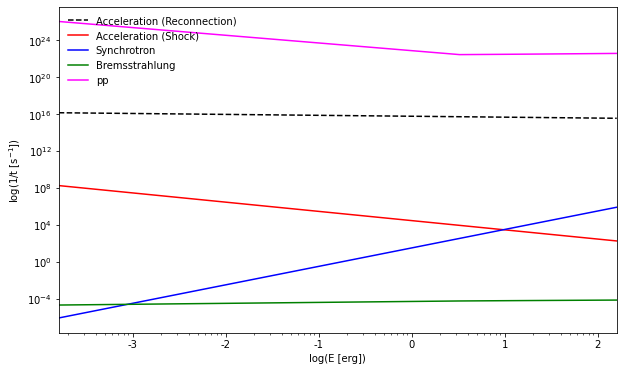

In [26]:
## erg

plt.figure(figsize=(10, 6))
plt.loglog(Ee,tacc_rec(Ee,l_x,B,rho),'--',label='Acceleration (Reconnection)',color='k')
plt.loglog(Ee,tacc_shock(B,Ee),label='Acceleration (Shock)',color='r')
plt.loglog(Ee,tloss_syn(Ee,B,m_e),label='Synchrotron',color='blue')
plt.loglog(Ee,tloss_bre(n,1,Ee),label='Bremsstrahlung',color='green')
plt.loglog(Ee,tloss_pp(n,Ee),label='pp',color='magenta')
# plt.loglog(Ee,tloss_pgamma(n,Ee),label='p-gamma',color='cyan')

plt.xlim((Ee.min(),Ee.max()))
plt.legend(frameon=False)
plt.xlabel('log(E [erg])')
plt.ylabel('log(1/t [s$^{-1}$])')
# plt.ylim((1e-4,1e4))
plt.xticks([1e-3,1e-2,1e-1,1e0,1e1,1e2],labels=['-3','-2','-1','0','1','2'])
plt.savefig('plots/cooling_leptons_erg.png',dpi=300)

plt.show()

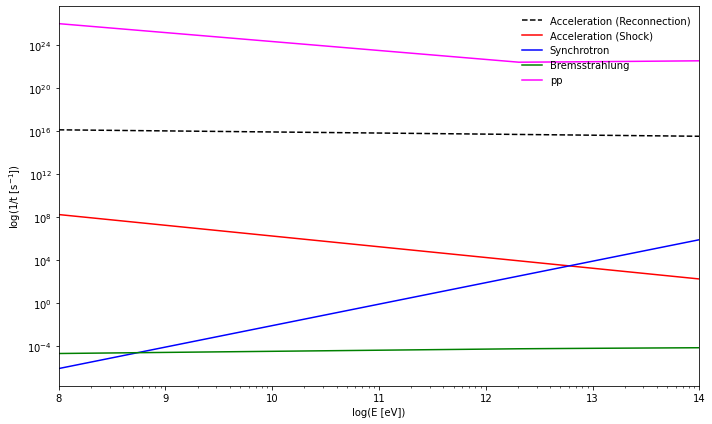

In [27]:
## eV

plt.figure(figsize=(10, 6))

plt.loglog(Ee/erg,tacc_rec(Ee,l_x,B,rho),'--',label='Acceleration (Reconnection)',color='k')
plt.loglog(Ee/erg,tacc_shock(B,Ee),label='Acceleration (Shock)',color='r')
plt.loglog(Ee/erg,tloss_syn(Ee,B,m_e),label='Synchrotron',color='blue')
plt.loglog(Ee/erg,tloss_bre(n,1,Ee),label='Bremsstrahlung',color='green')
plt.loglog(Ee/erg,tloss_pp(n,Ee),label='pp',color='magenta')
# plt.loglog(Ee/erg,tloss_pgamma(n,Ee),label='p-gamma',color='cyan')

plt.xlim((Ee.min()/erg,Ee.max()/erg))
plt.legend(frameon=False,loc='upper right')
plt.xlabel('log(E [eV])')
plt.ylabel('log(1/t [s$^{-1}$])')
# plt.ylim((1e-11,1e9))
plt.xticks([1e8,1e9,1e10,1e11,1e12,1e13,1e14],labels=['8','9','10','11','12','13','14'])

plt.tight_layout()
plt.savefig('plots/cooling_leptons_eV.png',dpi=300)

plt.show()